{}

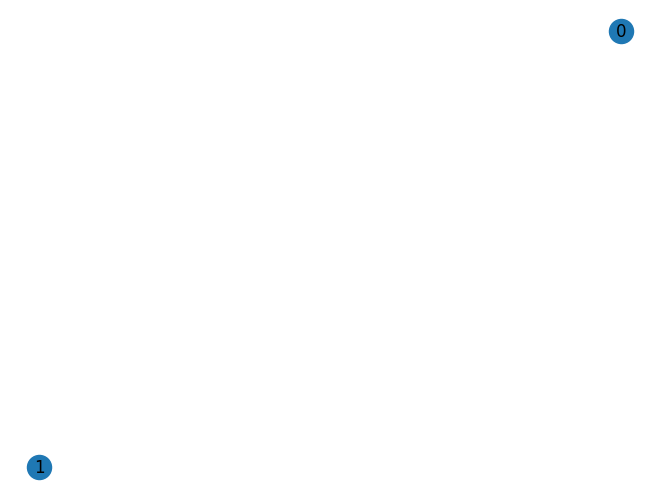

In [2]:
import networkx as nx
from geopy.distance import geodesic

# Defina suas coordenadas
coordenadas = [
    (40.748817, -73.985428), # Exemplo de coordenadas
    (37.774929, -122.419416),
    # Adicione mais coordenadas aqui
]

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para cada coordenada
for i, coord in enumerate(coordenadas):
    G.add_node(i, pos=coord)

# Adicionar arestas entre coordenadas próximas
for i, coord1 in enumerate(coordenadas):
    for j, coord2 in enumerate(coordenadas):
        if i != j: # Para evitar laços
            distancia = geodesic(coord1, coord2).km
            if distancia < 50: # Adicionar uma aresta se a distância for menor que 50 km
                G.add_edge(i, j, weight=distancia)

# Desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

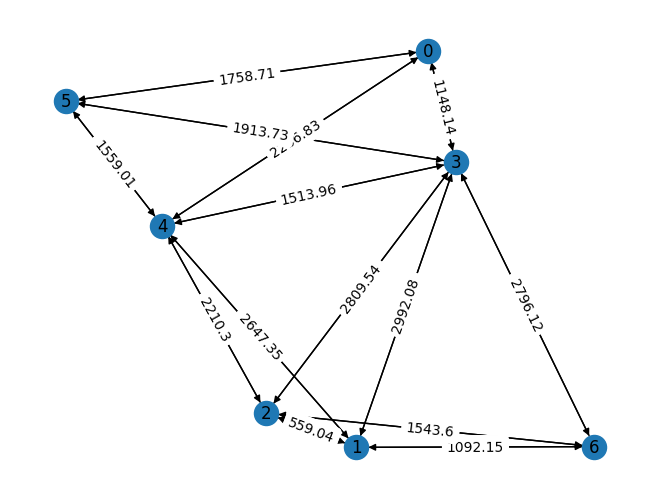

In [3]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Defina suas coordenadas
coordenadas = [
    (40.748817, -73.985428), # Nova York
    (37.774929, -122.419416), # São Francisco
    (34.052235, -118.243683), # Los Angeles
    (41.878113, -87.629799), # Chicago
    (29.760427, -95.369804), # Houston
    (25.761681, -80.191788), # Miami
    (47.606209, -122.332069)  # Seattle
]

# A ordem dos nós no grafo é determinada pela ordem em que as coordenadas são enumeradas na lista coordenadas.

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para cada coordenada
for i, coord in enumerate(coordenadas):
    G.add_node(i, pos=coord)

# Adicionar arestas entre coordenadas próximas
for i, coord1 in enumerate(coordenadas):
    for j, coord2 in enumerate(coordenadas):
        if i != j: # Para evitar laços
            distancia = geodesic(coord1, coord2).km
            if distancia < 3000: # Adicionar uma aresta se a distância for menor que 3000 km
                G.add_edge(i, j, weight=distancia)

# Desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
for key in labels:
    labels[key] = round(labels[key], 2) # Arredondando para duas casas decimais
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


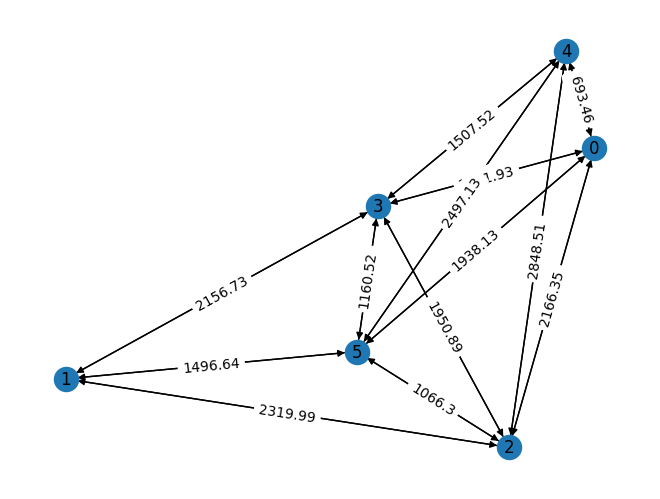

In [4]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Defina suas coordenadas
coordenadas = [
    (43.653225, -79.383186), # Toronto
    (19.432608, -99.133209), # Cidade do México
    (39.739236, -104.990251), # Denver
    (33.748995, -84.387982), # Atlanta
    (42.360253, -71.058291), # Boston
    (32.776665, -96.796989)  # Dallas
]

# A ordem dos nós no grafo é determinada pela ordem em que as coordenadas são enumeradas na lista coordenadas.

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para cada coordenada
for i, coord in enumerate(coordenadas):
    G.add_node(i, pos=coord)

# Adicionar arestas entre coordenadas próximas
for i, coord1 in enumerate(coordenadas):
    for j, coord2 in enumerate(coordenadas):
        if i != j: # Para evitar laços
            distancia = geodesic(coord1, coord2).km
            if distancia < 3000: # Adicionar uma aresta se a distância for menor que 3000 km
                G.add_edge(i, j, weight=distancia)

# Desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
for key in labels:
    labels[key] = round(labels[key], 2) # Arredondando para duas casas decimais
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [5]:
import pickle

# Salvar o grafo em um arquivo pickle
with open('grafo_coordenadas_2.pkl', 'wb') as f:
    pickle.dump(G, f)

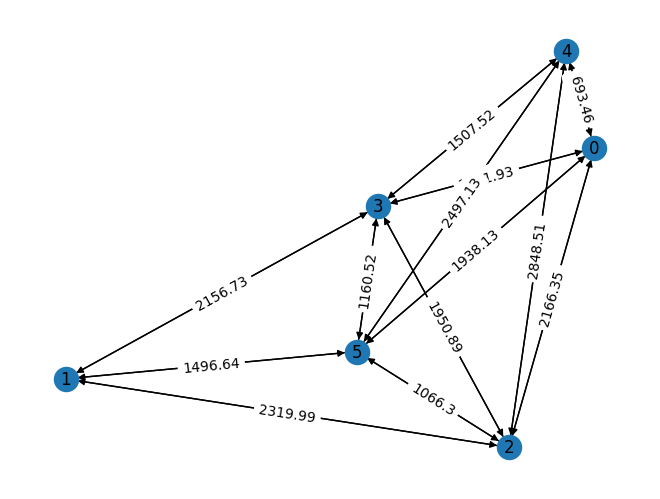

In [6]:
# Para carregar o grafo

with open('grafo_coordenadas_2.pkl', 'rb') as f:
    G_loaded = pickle.load(f)

# Para verificar se o grafo foi carregado corretamente, você pode desenhar o grafo carregado:
pos_loaded = nx.get_node_attributes(G_loaded, 'pos')
nx.draw(G_loaded, pos_loaded, with_labels=True)
labels_loaded = nx.get_edge_attributes(G_loaded, 'weight')
for key in labels_loaded:
    labels_loaded[key] = round(labels_loaded[key], 2) 
nx.draw_networkx_edge_labels(G_loaded, pos_loaded, edge_labels=labels_loaded)
plt.show()

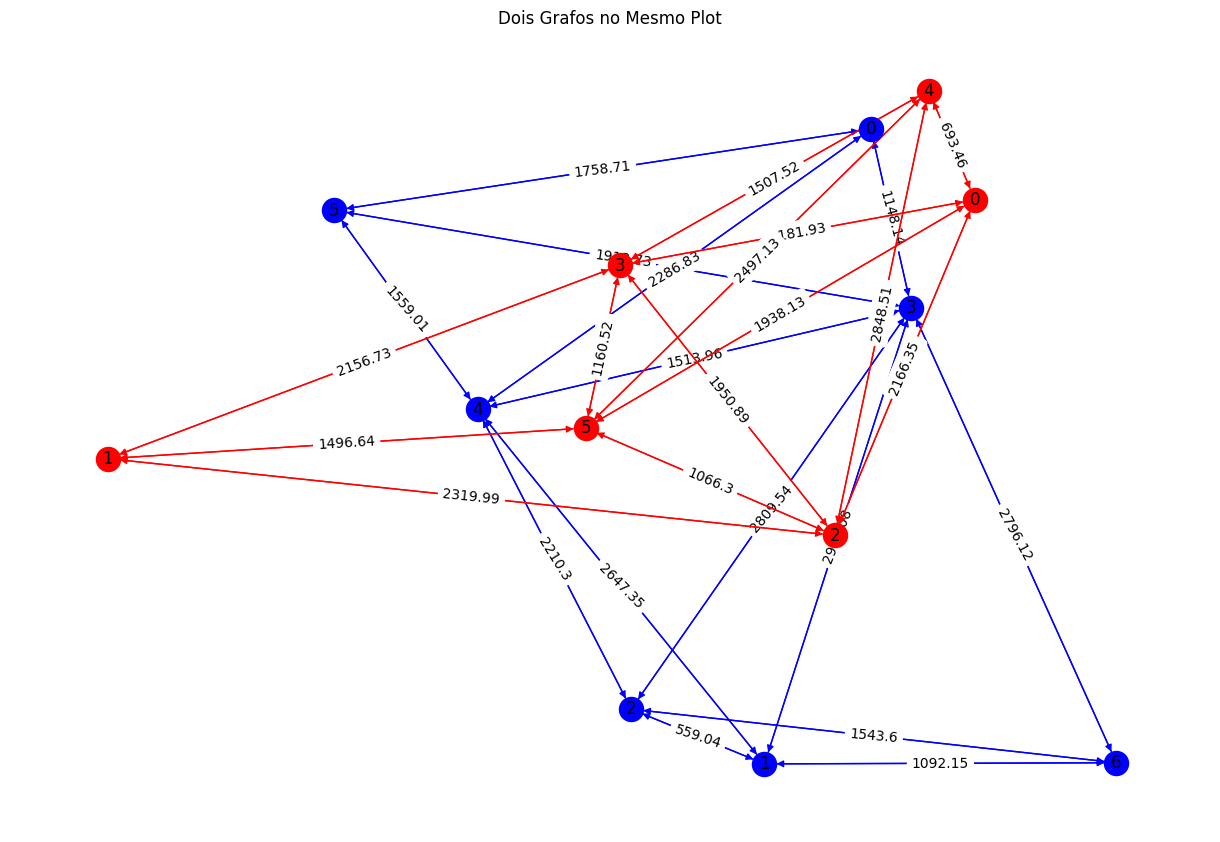

In [7]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import pickle

# Defina suas coordenadas originais e adicionais
coordenadas1 = [
    (40.748817, -73.985428), # Nova York
    (37.774929, -122.419416), # São Francisco
    (34.052235, -118.243683), # Los Angeles
    (41.878113, -87.629799), # Chicago
    (29.760427, -95.369804), # Houston
    (25.761681, -80.191788), # Miami
    (47.606209, -122.332069)  # Seattle
]

coordenadas2 = [
    (43.653225, -79.383186), # Toronto
    (19.432608, -99.133209), # Cidade do México
    (39.739236, -104.990251), # Denver
    (33.748995, -84.387982), # Atlanta
    (42.360253, -71.058291), # Boston
    (32.776665, -96.796989)  # Dallas
]

# Função para criar grafo
def criar_grafo(coordenadas):
    G = nx.DiGraph()

    for i, coord in enumerate(coordenadas):
        G.add_node(i, pos=coord)

    for i, coord1 in enumerate(coordenadas):
        for j, coord2 in enumerate(coordenadas):
            if i != j:
                distancia = geodesic(coord1, coord2).km
                if distancia < 3000:
                    G.add_edge(i, j, weight=distancia)
    return G

# Criar dois grafos
G1 = criar_grafo(coordenadas1)
G2 = criar_grafo(coordenadas2)

# Plotar ambos no mesmo gráfico
plt.figure(figsize=(12, 8))

pos1 = nx.get_node_attributes(G1, 'pos')
nx.draw(G1, pos1, with_labels=True, node_color='blue', edge_color='blue')
labels1 = nx.get_edge_attributes(G1, 'weight')
for key in labels1:
    labels1[key] = round(labels1[key], 2)
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=labels1)

pos2 = nx.get_node_attributes(G2, 'pos')
nx.draw(G2, pos2, with_labels=True, node_color='red', edge_color='red')
labels2 = nx.get_edge_attributes(G2, 'weight')
for key in labels2:
    labels2[key] = round(labels2[key], 2)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=labels2)

plt.title('Dois Grafos no Mesmo Plot')
plt.show()

# Salvar os dois grafos em um arquivo pickle (em uma tupla)
with open('grafosJuntos.pkl', 'wb') as f:
    pickle.dump((G1, G2), f)

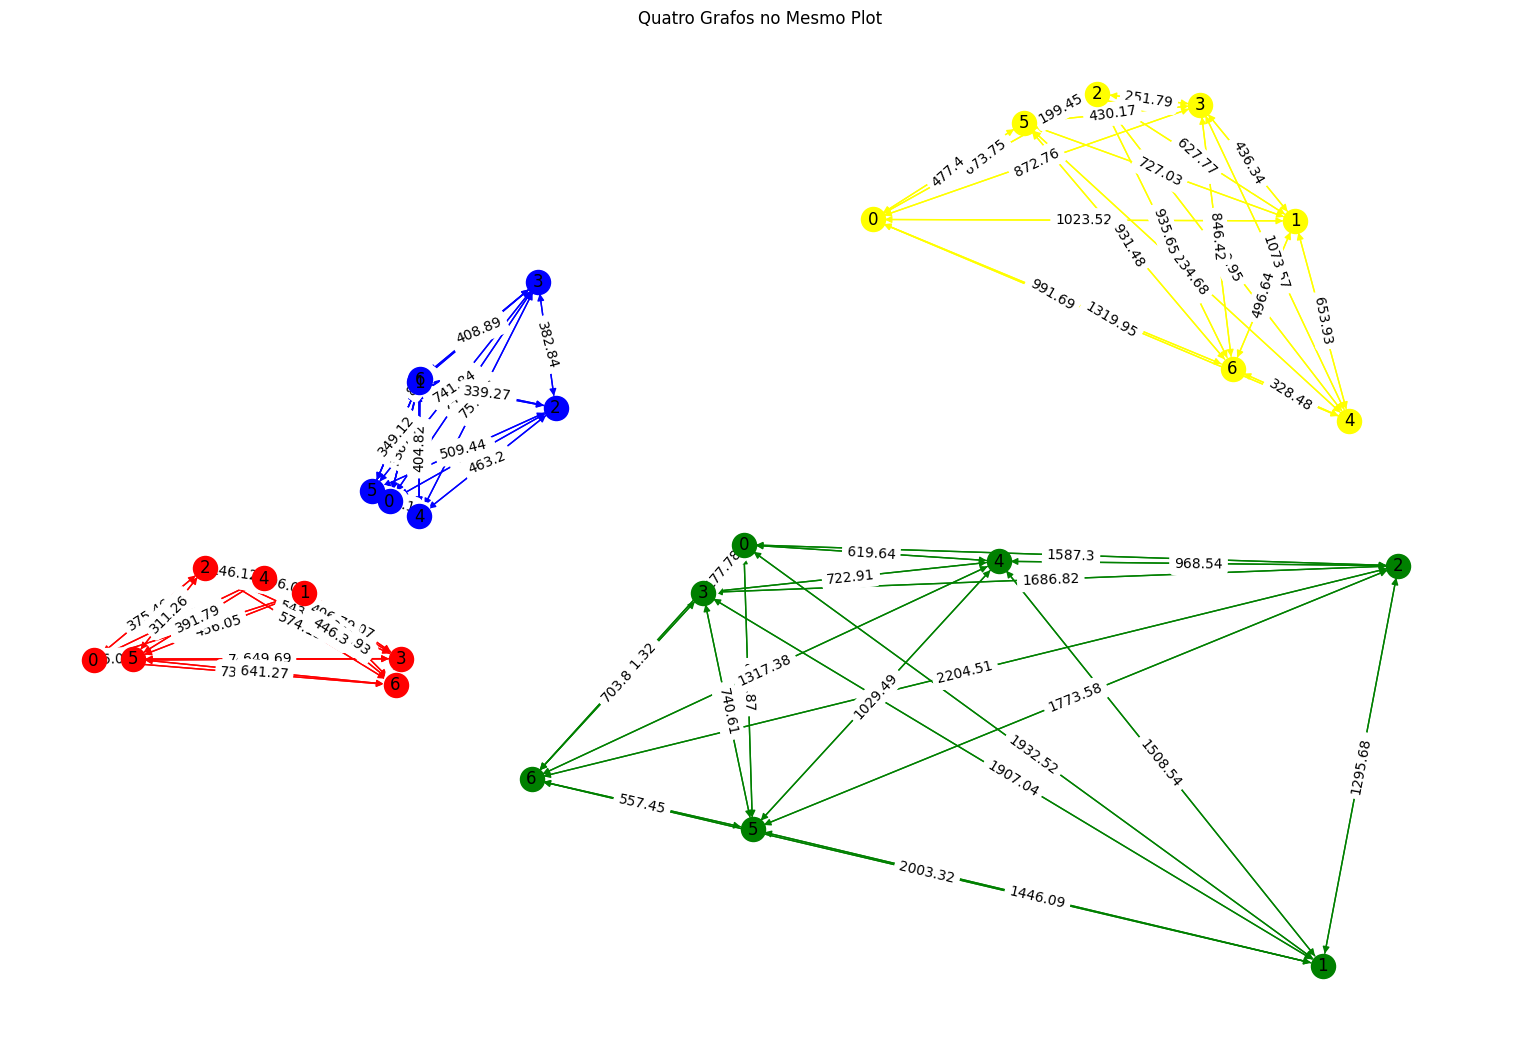

In [8]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import pickle

# Defina suas coordenadas originais
coordenadas1 = [
    (-23.5505, -46.6333),  # São Paulo
    (-22.9083, -43.1964),  # Rio de Janeiro
    (-19.9167, -43.9345),  # Belo Horizonte
    (-20.2976, -40.2958),  # Vitória
    (-22.9056, -47.0608),  # Campinas
    (-23.9359, -46.3350),  # Santos
    (-22.8833, -43.1152)   # Niterói
]

coordenadas2 = [
    (-30.0346, -51.2177),  # Porto Alegre
    (-25.4244, -49.2654),  # Curitiba
    (-27.5954, -48.5480),  # Florianópolis
    (-23.3045, -51.1696),  # Londrina
    (-26.3045, -48.8487),  # Joinville
    (-29.1685, -51.1790),  # Caxias do Sul
    (-23.4205, -51.9331)   # Maringá
]

coordenadas3 = [
    (-12.9714, -38.5014),  # Salvador
    (-3.7172, -38.5433),   # Fortaleza
    (-8.0476, -34.8768),   # Recife
    (-5.7936, -35.1986),   # Natal
    (-2.5307, -44.3068),   # São Luís
    (-9.6498, -35.7089),   # Maceió
    (-5.0892, -42.8040)    # Teresina
]

coordenadas4 = [
    (-15.7942, -47.8822),  # Brasília
    (-3.1189, -60.0212),   # Manaus
    (-1.4558, -48.4902),   # Belém
    (-16.6869, -49.2648),  # Goiânia
    (-10.2129, -48.3603),  # Palmas
    (-15.6014, -56.0979),  # Cuiabá
    (-20.4428, -54.6460)   # Campo Grande
]

# Função para criar grafo
def criar_grafo(coordenadas):
    G = nx.DiGraph()

    for i, coord in enumerate(coordenadas):
        G.add_node(i, pos=coord)

    for i, coord1 in enumerate(coordenadas):
        for j, coord2 in enumerate(coordenadas):
            if i != j:
                distancia = geodesic(coord1, coord2).km
                if distancia < 3000:
                    G.add_edge(i, j, weight=distancia)
    return G

# Criar quatro grafos
G1 = criar_grafo(coordenadas1)
G2 = criar_grafo(coordenadas2)
G3 = criar_grafo(coordenadas3)
G4 = criar_grafo(coordenadas4)

# Plotar todos no mesmo gráfico
plt.figure(figsize=(15, 10))

def plot_graph(G, pos, color):
    nx.draw(G, pos, with_labels=True, node_color=color, edge_color=color)
    labels = nx.get_edge_attributes(G, 'weight')
    for key in labels:
        labels[key] = round(labels[key], 2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plot_graph(G1, nx.get_node_attributes(G1, 'pos'), 'blue')
plot_graph(G2, nx.get_node_attributes(G2, 'pos'), 'red')
plot_graph(G3, nx.get_node_attributes(G3, 'pos'), 'yellow')
plot_graph(G4, nx.get_node_attributes(G4, 'pos'), 'green')

plt.title('Quatro Grafos no Mesmo Plot')
plt.show()

# Salvar os quatro grafos em um arquivo pickle (em uma tupla)
with open('grafos.pkl', 'wb') as f:
    pickle.dump((G1, G2, G3, G4), f)

In [9]:
import networkx as nx
from geopy.distance import geodesic
import folium

# Definindo as coordenadas
coordenadas1 = [
    (-23.5505, -46.6333),  # São Paulo
    (-22.9083, -43.1964),  # Rio de Janeiro
    (-19.9167, -43.9345),  # Belo Horizonte
    (-20.2976, -40.2958),  # Vitória
    (-22.9056, -47.0608),  # Campinas
    (-23.9359, -46.3350),  # Santos
    (-22.8833, -43.1152)   # Niterói
]

coordenadas2 = [
    (-30.0346, -51.2177),  # Porto Alegre
    (-25.4244, -49.2654),  # Curitiba
    (-27.5954, -48.5480),  # Florianópolis
    (-23.3045, -51.1696),  # Londrina
    (-26.3045, -48.8487),  # Joinville
    (-29.1685, -51.1790),  # Caxias do Sul
    (-23.4205, -51.9331)   # Maringá
]

coordenadas3 = [
    (-12.9714, -38.5014),  # Salvador
    (-3.7172, -38.5433),   # Fortaleza
    (-8.0476, -34.8768),   # Recife
    (-5.7936, -35.1986),   # Natal
    (-2.5307, -44.3068),   # São Luís
    (-9.6498, -35.7089),   # Maceió
    (-5.0892, -42.8040)    # Teresina
]

coordenadas4 = [
    (-15.7942, -47.8822),  # Brasília
    (-3.1189, -60.0212),   # Manaus
    (-1.4558, -48.4902),   # Belém
    (-16.6869, -49.2648),  # Goiânia
    (-10.2129, -48.3603),  # Palmas
    (-15.6014, -56.0979),  # Cuiabá
    (-20.4428, -54.6460)   # Campo Grande
]

def criar_grafo(coordenadas):
    G = nx.DiGraph()
    for i, coord in enumerate(coordenadas):
        G.add_node(i, pos=coord)
    for i, coord1 in enumerate(coordenadas):
        for j, coord2 in enumerate(coordenadas):
            if i != j:
                distancia = geodesic(coord1, coord2).km
                if distancia < 3000:
                    G.add_edge(i, j, weight=distancia)
    return G

G1 = criar_grafo(coordenadas1)
G2 = criar_grafo(coordenadas2)
G3 = criar_grafo(coordenadas3)
G4 = criar_grafo(coordenadas4)

# Criando um mapa centrado no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Cores para os grafos
cores = ['blue', 'red', 'yellow', 'green']

# Função para adicionar os grafos ao mapa
def plotar_grafo_no_mapa(G, cor):
    pos = nx.get_node_attributes(G, 'pos')
    for node, coordenadas in pos.items():
        folium.Marker(coordenadas).add_to(mapa)
    for edge in G.edges():
        start_pos = pos[edge[0]]
        end_pos = pos[edge[1]]
        folium.PolyLine([start_pos, end_pos], color=cor).add_to(mapa)

plotar_grafo_no_mapa(G1, cores[0])
plotar_grafo_no_mapa(G2, cores[1])
plotar_grafo_no_mapa(G3, cores[2])
plotar_grafo_no_mapa(G4, cores[3])

mapa.save('mapa_grafos.html')